# Section 2.7 — Random variable generation

This notebook contains the code examples from [Section 2.7 Random variable generation]() of the **No Bullshit Guide to Statistics**.



#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

# # silence annoying warnings
# import warnings; warnings.filterwarnings('ignore')

In [3]:
# set random seed for repeatability
random.seed(42)
np.random.seed(42)

## Synthetic data generation using simulation

In [4]:
import random

random.random()

0.6394267984578837

In [5]:
import numpy as np

np.random.rand(8)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615])

### Discrete random variable generation

In [6]:
def toss_coin(p=0.5):
    r = random.random()
    if r < p:
        return "heads"
    else:
        return "tails"

toss_coin(p=0.3)

'heads'

In [7]:
n = 1000
nflips = [toss_coin(p=0.3) for i in range(0,n)]
nflips.count("heads") / n

0.295

### Continuous random variable generation (optional)

#### Example: generating from the exponential distribution

<AxesSubplot:ylabel='Density'>

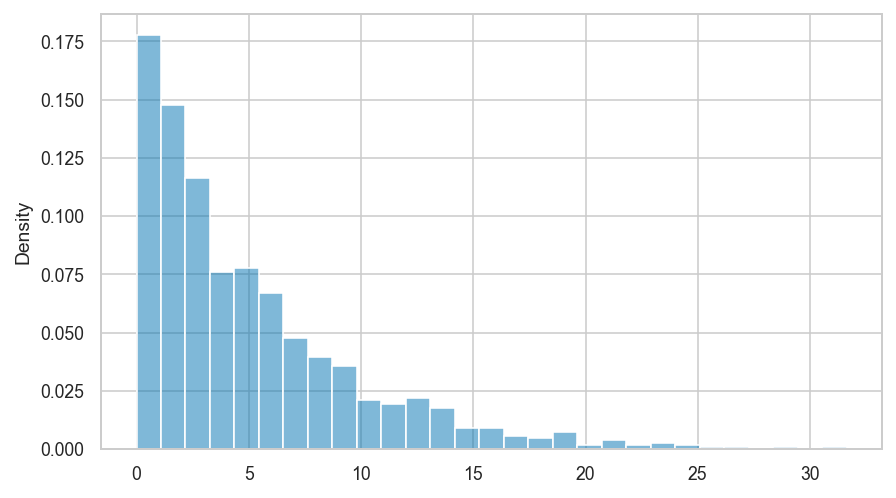

In [8]:
fig, ax = plt.subplots()

# manual random number generation
np.random.seed(6)
us = np.random.rand(1000)
lam = 0.2
es = -1 * np.log(1-us) / lam
sns.histplot(es, stat="density", ax=ax, alpha=0.5)

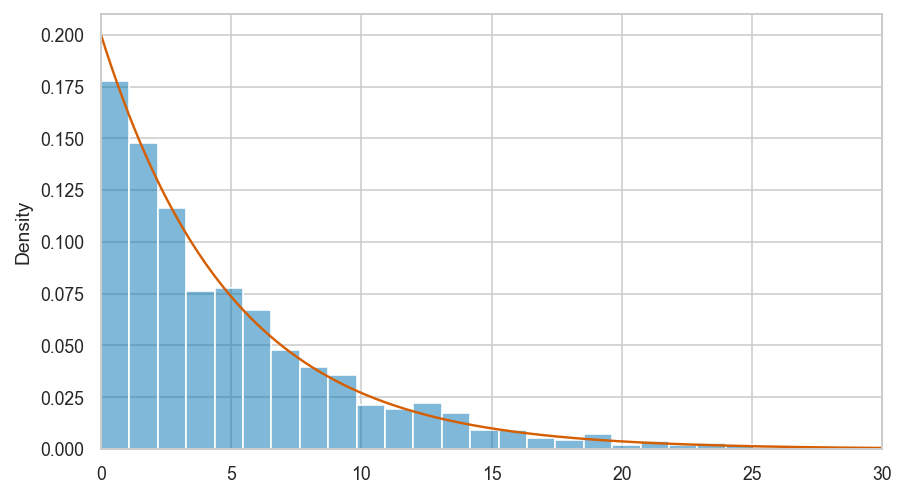

In [9]:
# theoretical probability density function
from scipy.stats import expon
rvE = expon(0,1/lam)
xs = np.linspace(0,35,1000)
fEs = rvE.pdf(xs)
sns.lineplot(x=xs, y=fEs, ax=ax, color="r")
ax.set_xlim([0,30])
fig

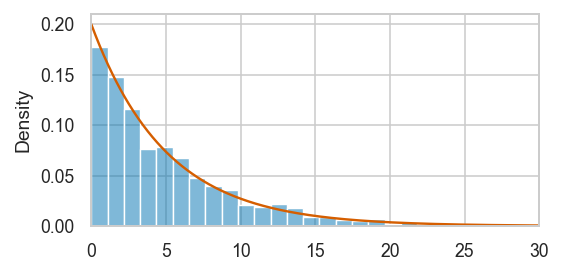

In [10]:
filename = "figures/prob/generate_exp_and_pdf_rvE.pdf"
with plt.rc_context({"figure.figsize":(4,2)}):
    fig, ax = plt.subplots()
    sns.histplot(es, stat="density", ax=ax, alpha=0.5)
    sns.lineplot(x=xs, y=fEs, ax=ax, color="r")
    ax.set_xlim([0,30])
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

## Empirical distributions


Let's generate some random variable observations,
in order to be able to discuss.

In [11]:
from scipy.stats import norm

rvN = norm(1000,100)
ndata = rvN.rvs(1000)

<AxesSubplot:>

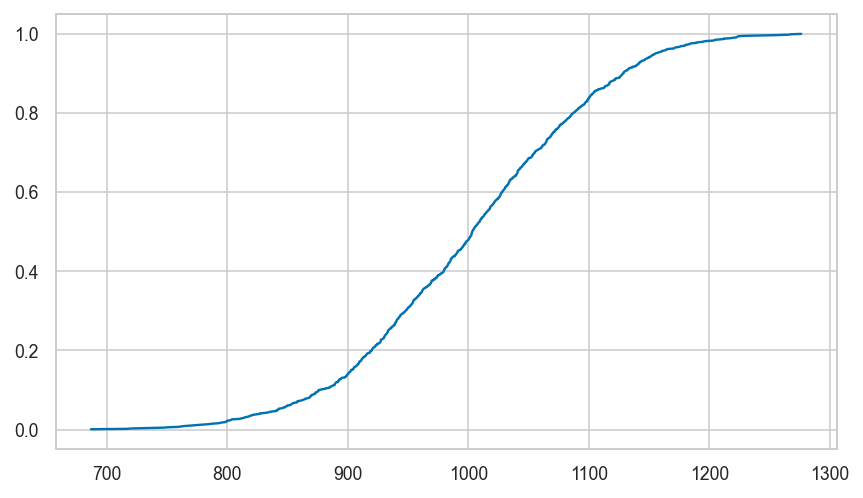

In [12]:
def ecdf(data):
    """
    Compute ECDF for on list of data observations.
    """
    n = len(data)
    xs = np.sort(data)
    ys = np.arange(1, n+1) / n
    return xs, ys

x1, y1 = ecdf(ndata)

sns.lineplot(x=x1, y=y1)

<AxesSubplot:>

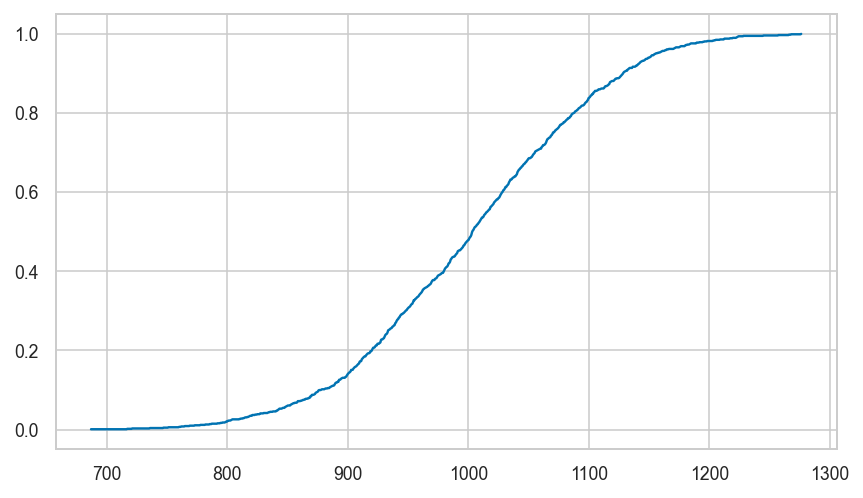

In [13]:
import statsmodels.api as sm

ecdf2 = sm.distributions.ECDF(ndata)

x2 = np.linspace(min(ndata),max(ndata),1000)
y2 = ecdf2(x2)
sns.lineplot(x=x2, y=y2)

## Measuring model-data fit

In [14]:
import numpy as np
udata = np.random.rand(1000)         # ~ U(0,1)

edata = -1 * np.log(1-udata) / 0.2   # ~ Expon(lam=0.2)

from scipy.stats import norm
ndata = norm(1000, 100).rvs(1000)    # ~ N(1000, 100)

### Graphical methods

In [15]:
from statsmodels.graphics.api import qqplot

#### Normal data vs. normal model

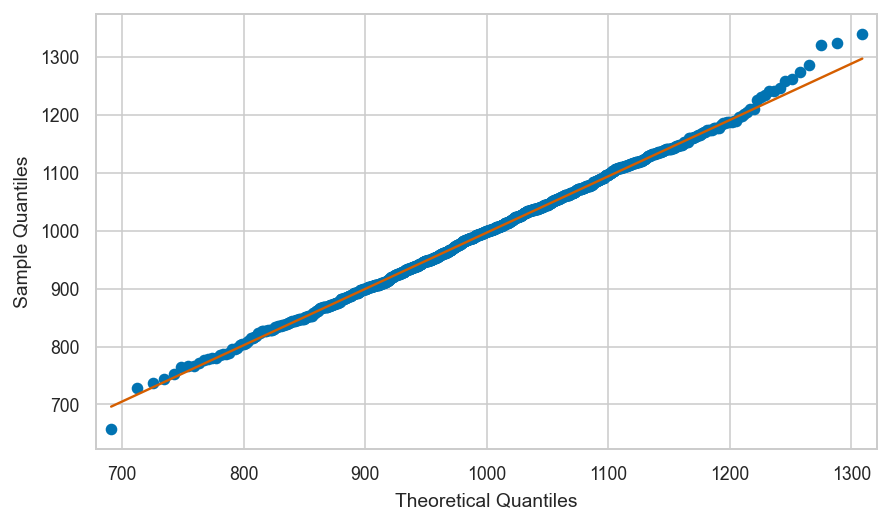

In [16]:
_ = qqplot(ndata, dist=norm(1000,100), line='q')

In [17]:
# filename = "figures/prob/qqplot_ndata_vs_norm1000_100.pdf"
# with plt.rc_context({"figure.figsize":(4,3)}):
#     fig = qqplot(ndata, dist=norm(1000,100), line='q', markersize=1)
#     fig.tight_layout()
#     fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Normal data vs. standard normal

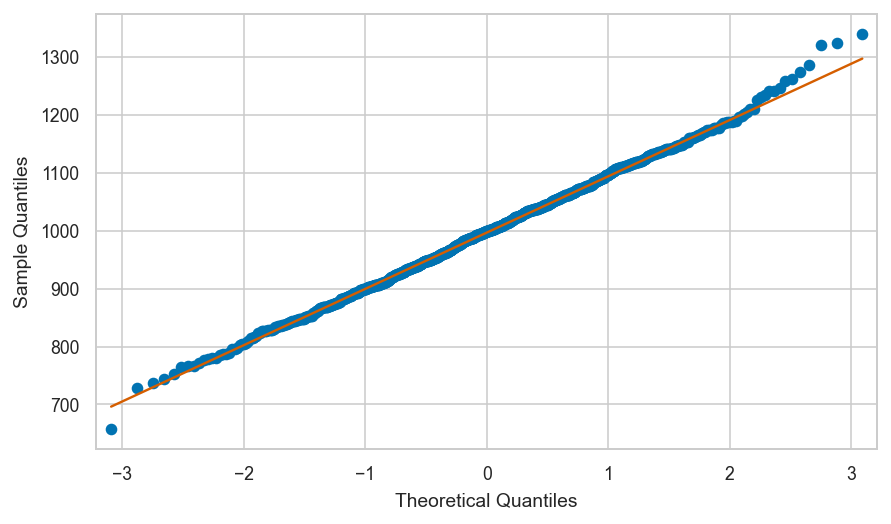

In [18]:
_ = qqplot(ndata, dist=norm(0,1), line='q')

In [19]:
# filename = "figures/prob/qqplot_ndata_vs_stdnorm.pdf"
# with plt.rc_context({"figure.figsize":(4,3)}):
#     fig = qqplot(ndata, dist=norm(0,1), line='q', markersize=1)
#     fig.tight_layout()
#     fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Exponential data vs. standard normal

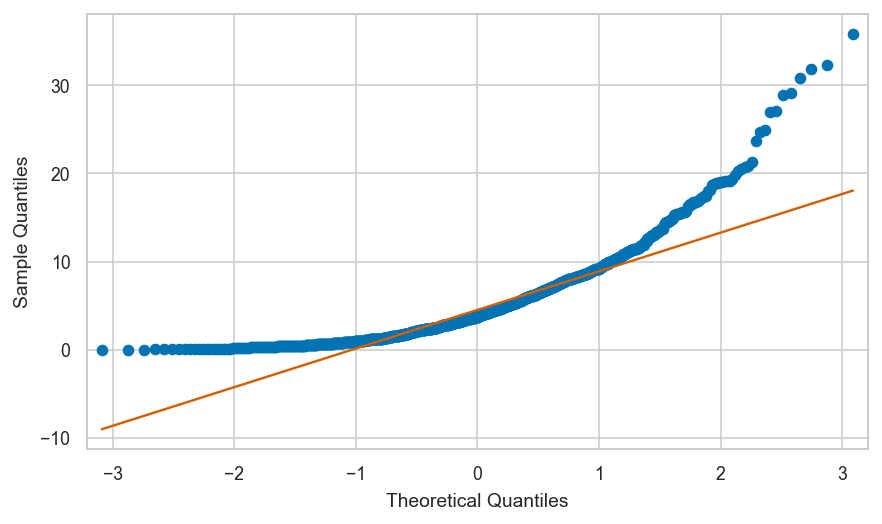

In [20]:
_ = qqplot(edata, dist=norm(0,1), line='q')

In [21]:
# filename = "figures/prob/qqplot_edata_vs_stdnorm.pdf"
# with plt.rc_context({"figure.figsize":(4,3)}):
#     fig = qqplot(edata, dist=norm(0,1), line='q', markersize=1)
#     fig.tight_layout()
#     fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Uniform data vs. standard normal

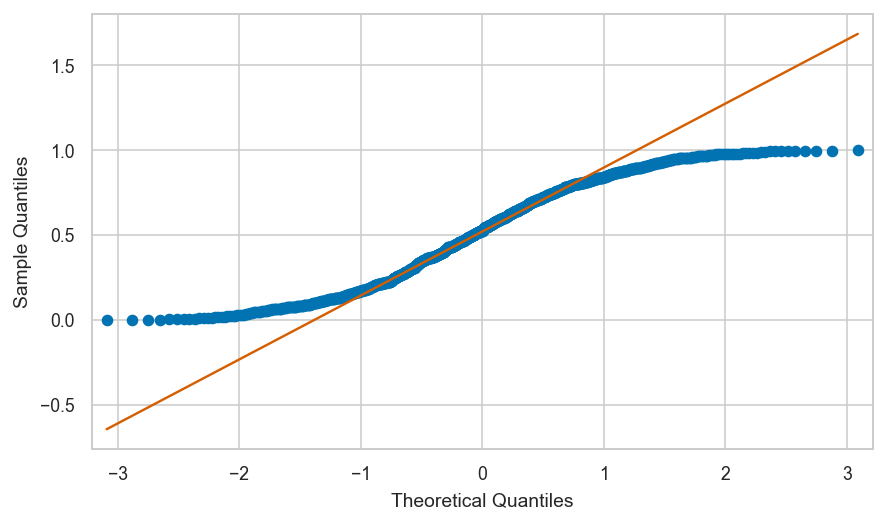

In [22]:
_ = qqplot(udata, dist=norm(0,1), line='q')

In [23]:
# filename = "figures/prob/qqplot_udata_vs_stdnorm.pdf"
# with plt.rc_context({"figure.figsize":(4,3)}):
#     fig = qqplot(udata, dist=norm(0,1), line='q', markersize=1)
#     fig.tight_layout()
#     fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

#### Exponential data vs exponential model

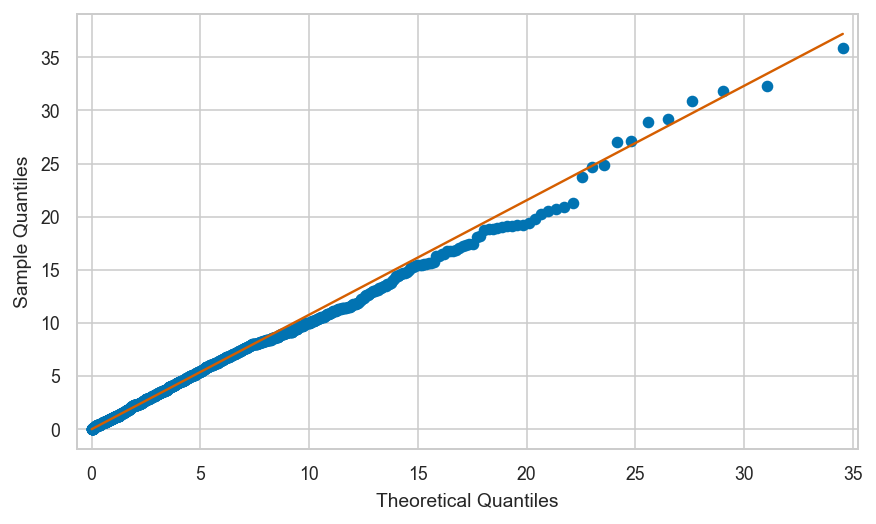

In [24]:
from scipy.stats import expon

_ = qqplot(edata, dist=rvE, line='q')

In [25]:
# filename = "figures/prob/qqplot_edata_vs_rvE.pdf"
# with plt.rc_context({"figure.figsize":(4,3)}):
#     fig = qqplot(edata, dist=rvE, line='q', markersize=1)
#     fig.tight_layout()
#     fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0.02)

<AxesSubplot:>

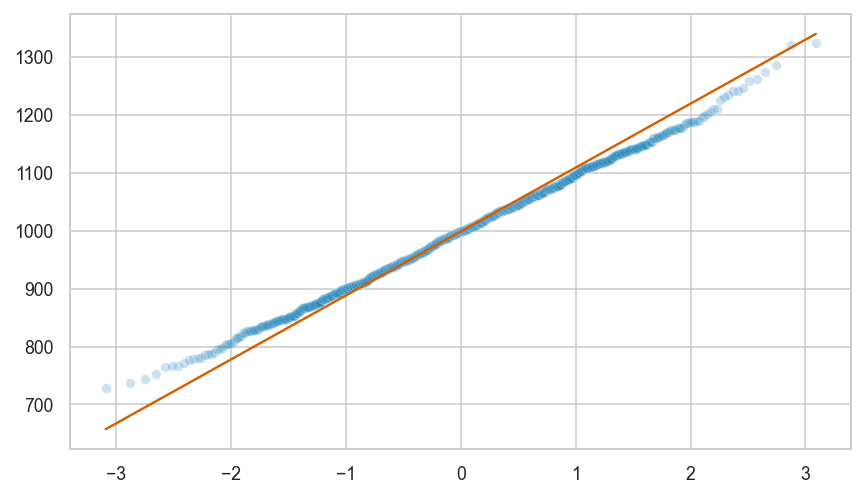

In [27]:
def qq_plot(data, model):
    """
    Prepares the values for a Q-Q plot.
    """
    ps = np.linspace(0, 1, 1000)
    q1 = model.ppf(ps)
    # print(q1)
    q2 = np.quantile(data, ps)
    ax = sns.scatterplot(x=q1, y=q2, alpha=0.2)
    # see https://github.com/statsmodels/statsmodels/blob/main/statsmodels/graphics/gofplots.py#L912-L919
    xs = np.linspace(min(q1[1:]),max(q1[:-1]))
    ys = np.linspace(min(q2),max(q2))
    # print(xs,ys)
    sns.lineplot(x=xs, y=ys, color="r")
    return ax


qq_plot(ndata, norm(0,1))


# # ALT.
# plt.plot(q1, q2, ls="", marker="o")
# 
# plt.plot(x, x, color="k", ls="--")
# plt.show()

In [ ]:
_ = qqplot(ndata, dist=norm(0,1), line='q')

In [ ]:
from scipy.stats import probplot

# _ = probplot(data, dist=rvN, plot=plt)
_ = probplot(ndata, dist=norm, plot=plt)

### Compare moments

In [ ]:
# convert `edata` to Pandas series
eseries = pd.Series(edata)

In [ ]:
eseries.mean(), rvE.mean()

In [ ]:
eseries.var(), rvE.var()

The [skew](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html) of dataset and the skew of the distribution:

In [ ]:
eseries.skew(), rvE.stats("s")

The [kurtosis](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurt.html) of dataset and the kurtosis of the distribution.

In [ ]:
eseries.kurt(), rvE.stats("k")

### Kolmogorov–Smirnov test

In [ ]:
from scipy.stats import ks_1samp

### Example 1: KS distance of `edata` to reference

In [ ]:
from scipy.stats import expon
lam = 0.2
rvE = expon(0,1/lam)

result = ks_1samp(edata, rvE.cdf)
result.statistic

In [ ]:
xs = np.linspace(0,35,1000)
fEs = rvE.pdf(xs)
ax = sns.histplot(edata, stat="density")
sns.lineplot(x=xs, y=fEs, ax=ax, color="r")

### Example 2: KS distance of `ndata` to reference normal

In [ ]:
from scipy.stats import norm

rvN = norm(1000,100)
result = ks_1samp(ndata, rvN.cdf)
result.statistic

In [ ]:
ax = sns.histplot(ndata, stat="density")
xs = np.linspace(600,1400,1000)
fNs = rvN.pdf(xs)
sns.lineplot(x=xs, y=fNs, ax=ax, color="r")

In [ ]:
def standardize(data):
    xbar = data.mean()
    s = data.std(ddof=1)
    return (data-xbar)/s

ndata_std = standardize(ndata)
result = ks_1samp(ndata_std, norm(0,1).cdf)
result.statistic

In [ ]:
edata_std = standardize(edata)
result = ks_1samp(edata_std, norm(0,1).cdf)
result.statistic

In [ ]:
udata_std = standardize(udata)
result = ks_1samp(udata_std, norm(0,1).cdf)
result.statistic

### Implementation of `ks_1samp` (optional)

In [ ]:
from scipy.stats import norm
from scipy.stats import kstwo

def eCDF(data, b):
    data.sort()               # sort the data
    count = sum(data <= b)    # counts # obs. <= b
    return count / len(data)  # proportion of total

def ks_dist(sample, rv=norm(0,1)):
    """
    Compute the KS distance between observed data in `sample`
    and the theoretical distribution of random variable `rv`.
    """
    ks_dists = []
    for xi in sample:
        eCDFx = eCDF(sample, b = xi)
        ks_dist = abs(eCDFx - rv.cdf(xi))
        ks_dists.append(ks_dist)
    max_ks_dist = max(ks_dists)
    return max_ks_dist

ks_dist(ndata, rv=norm(1000,100))

In [ ]:
ks_dist(standardize(ndata), rv=norm(0,1))

## Bootstrap sample generation

## Discussion